## Importing libraries and files

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import datetime

In [2]:
path = r'/Users/helen/Airbnb Project'

In [3]:
listings_23 = pd.read_csv(os.path.join(path, '01 Data','Prepared Data', 'June 2023', 'listings_23_clean.csv'), index_col = False)

In [4]:
listings_24 = pd.read_csv(os.path.join(path, '01 Data','Prepared Data', 'March 2024', 'listings_24_clean.csv'), index_col = False)

In [127]:
reviews_23 = pd.read_csv(os.path.join(path, '01 Data','Prepared Data', 'June 2023', 'reviews_23_clean.csv'), index_col = False)

/var/folders/wm/8ygmn5ys7rqd5g0bpw0v8dt00000gq/T/ipykernel_19798/4271732046.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_23 = pd.read_csv(os.path.join(path, '01 Data','Prepared Data', 'June 2023', 'reviews_23_clean.csv'), index_col = False)


In [128]:
reviews_24 = pd.read_csv(os.path.join(path, '01 Data','Prepared Data', 'June 2023', 'reviews_23_clean.csv'), index_col = False)

/var/folders/wm/8ygmn5ys7rqd5g0bpw0v8dt00000gq/T/ipykernel_19798/158794518.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_24 = pd.read_csv(os.path.join(path, '01 Data','Prepared Data', 'June 2023', 'reviews_23_clean.csv'), index_col = False)


In [129]:
#Checking for mixed data in reviews dfs

for col in reviews_23.columns.tolist():
  weird = (reviews_23[[col]].map(type) != reviews_23[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (reviews_23[weird]) > 0:
    print (col)

Unnamed: 0
date
comments


In [130]:
#Adjusting data types

reviews_23['comments'] = reviews_23['comments'].astype('str')

In [131]:
reviews_24['comments'] = reviews_24['comments'].astype('str')

In [148]:
reviews_23['date'] = pd.to_datetime(reviews_23['date'])

In [149]:
reviews_24['date'] = pd.to_datetime(reviews_24['date'])

## Creating a correlation heatmap - listings 2023

In [69]:
#Creating a subset without unncessary columns

listings_23_subset = listings_23[['price', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count']]

In [70]:
#Create a correlation matrix using pandas

listings_23_subset.corr()

price  latitude  longitude  minimum_nights  \
price                           1.000000 -0.019296   0.010461       -0.001972   
latitude                       -0.019296  1.000000   0.037147       -0.001674   
longitude                       0.010461  0.037147   1.000000        0.006793   
minimum_nights                 -0.001972 -0.001674   0.006793        1.000000   
number_of_reviews              -0.019706  0.084619   0.011131       -0.013773   
calculated_host_listings_count  0.099796 -0.047045   0.022758        0.038498   

                                number_of_reviews  \
price                                   -0.019706   
latitude                                 0.084619   
longitude                                0.011131   
minimum_nights                          -0.013773   
number_of_reviews                        1.000000   
calculated_host_listings_count          -0.038902   

                                calculated_host_listings_count  
price                                                 0.099796  
latitude                                             -0.047045  
longitude                                             0.022758  
minimum_nights                                        0.038498  
number_of_reviews                                    -0.038902  
calculated_host_listings_count                        1.000000

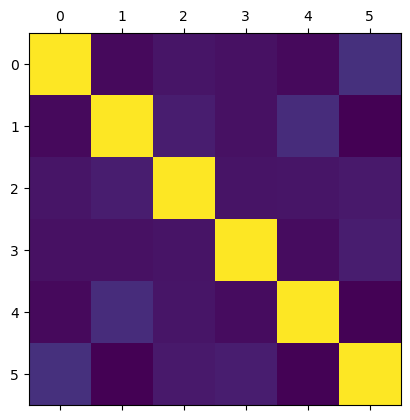

In [74]:
#Create a correlation heatmap using matplotlib

plt.matshow(listings_23_subset.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

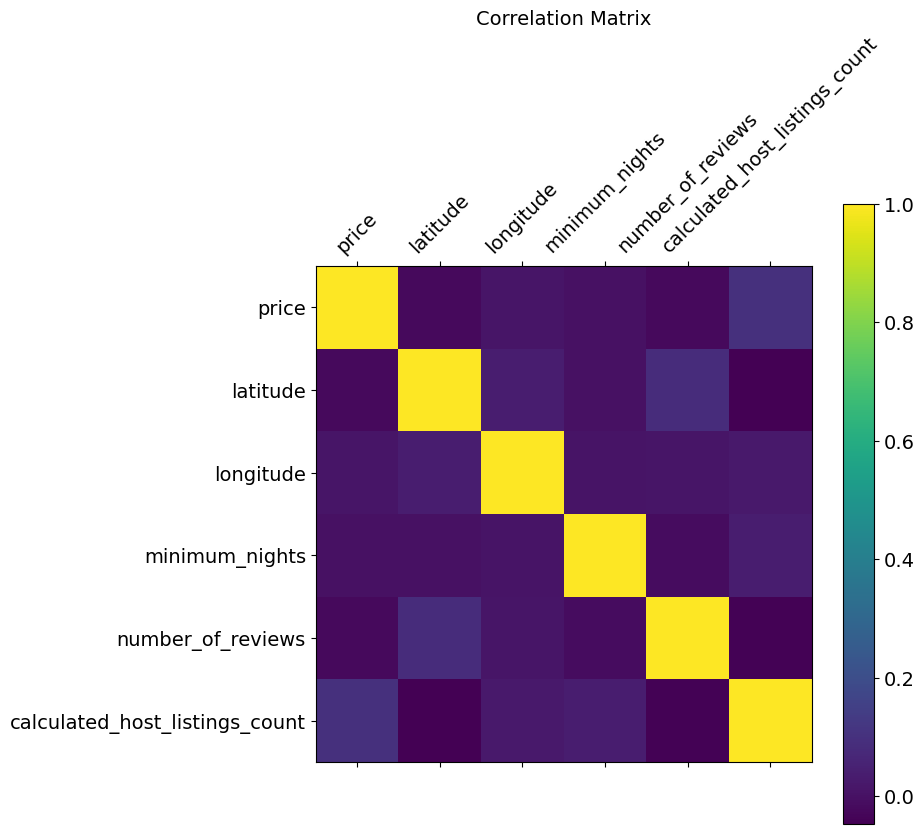

In [72]:
#Adding labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(listings_23_subset.corr(), fignum=f.number) # type of plot
plt.xticks(range(listings_23_subset.shape[1]), listings_23_subset.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(listings_23_subset.shape[1]), listings_23_subset.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

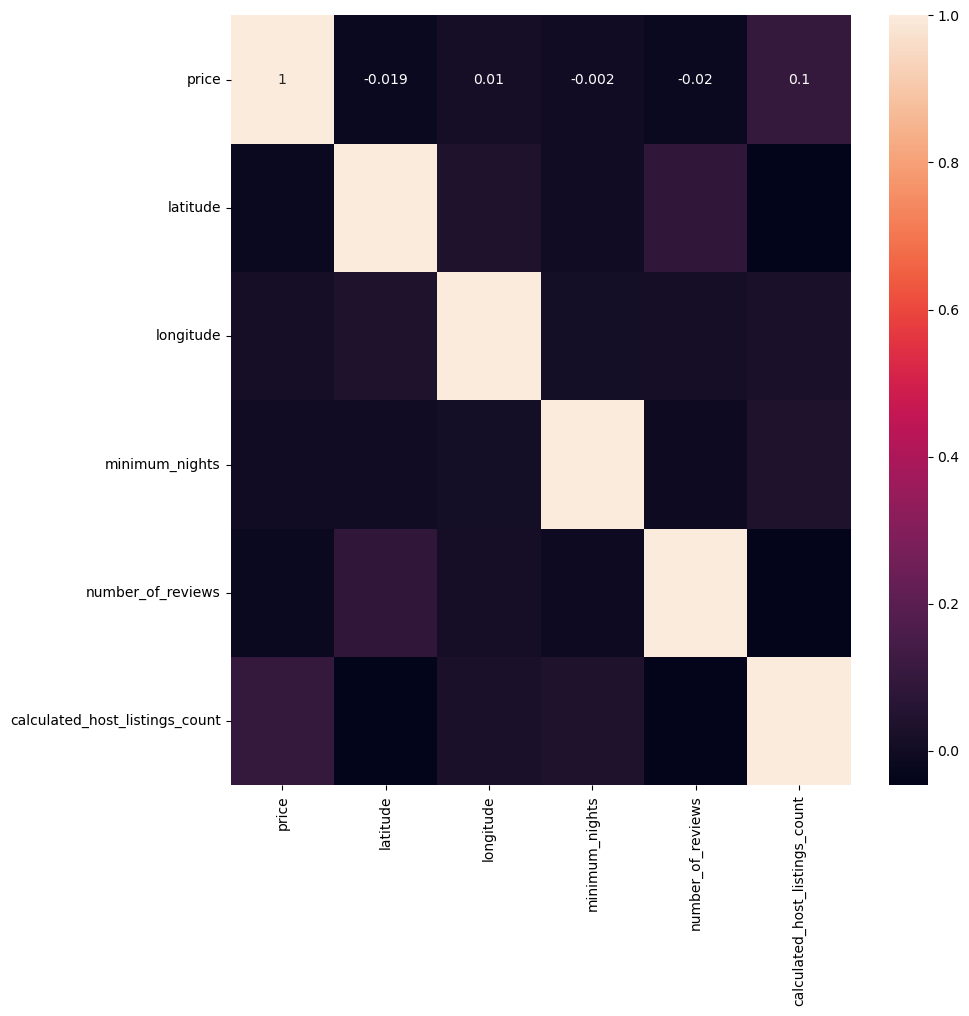

In [75]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(listings_23_subset.corr(), annot = True, ax = ax)

There do not appear to be any meaningful relationships between variables.

## Creating a scatterplot - listings 2024

In [82]:
#Creating a subset without unncessary columns

listings_24_subset = listings_24[['price', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count']]

In [84]:
#Creating a correlation matrix

listings_24_subset.corr()

price  latitude  longitude  minimum_nights  \
price                           1.000000 -0.020231  -0.001193       -0.000764   
latitude                       -0.020231  1.000000   0.044051       -0.001412   
longitude                      -0.001193  0.044051   1.000000        0.010021   
minimum_nights                 -0.000764 -0.001412   0.010021        1.000000   
number_of_reviews              -0.017941  0.087681   0.015796       -0.016061   
calculated_host_listings_count  0.059444 -0.038897   0.023008        0.024158   

                                number_of_reviews  \
price                                   -0.017941   
latitude                                 0.087681   
longitude                                0.015796   
minimum_nights                          -0.016061   
number_of_reviews                        1.000000   
calculated_host_listings_count          -0.042662   

                                calculated_host_listings_count  
price                                                 0.059444  
latitude                                             -0.038897  
longitude                                             0.023008  
minimum_nights                                        0.024158  
number_of_reviews                                    -0.042662  
calculated_host_listings_count                        1.000000

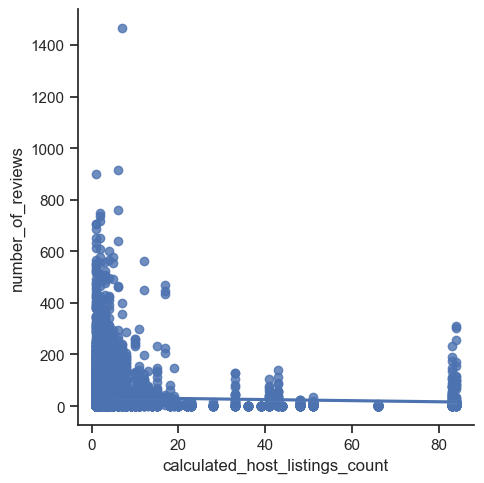

In [137]:
#Creating a scatterplot for the "price" and "calculated_host_listings_count" columns in seaborn

q = sns.lmplot(x = 'calculated_host_listings_count', y = 'number_of_reviews', data = listings_24_subset)

There appears to be a very weak negative relationship between the amount of reviews a property receives and how many properties a host owns. 

## Creating a pair plot - listings 2023 and 2024

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

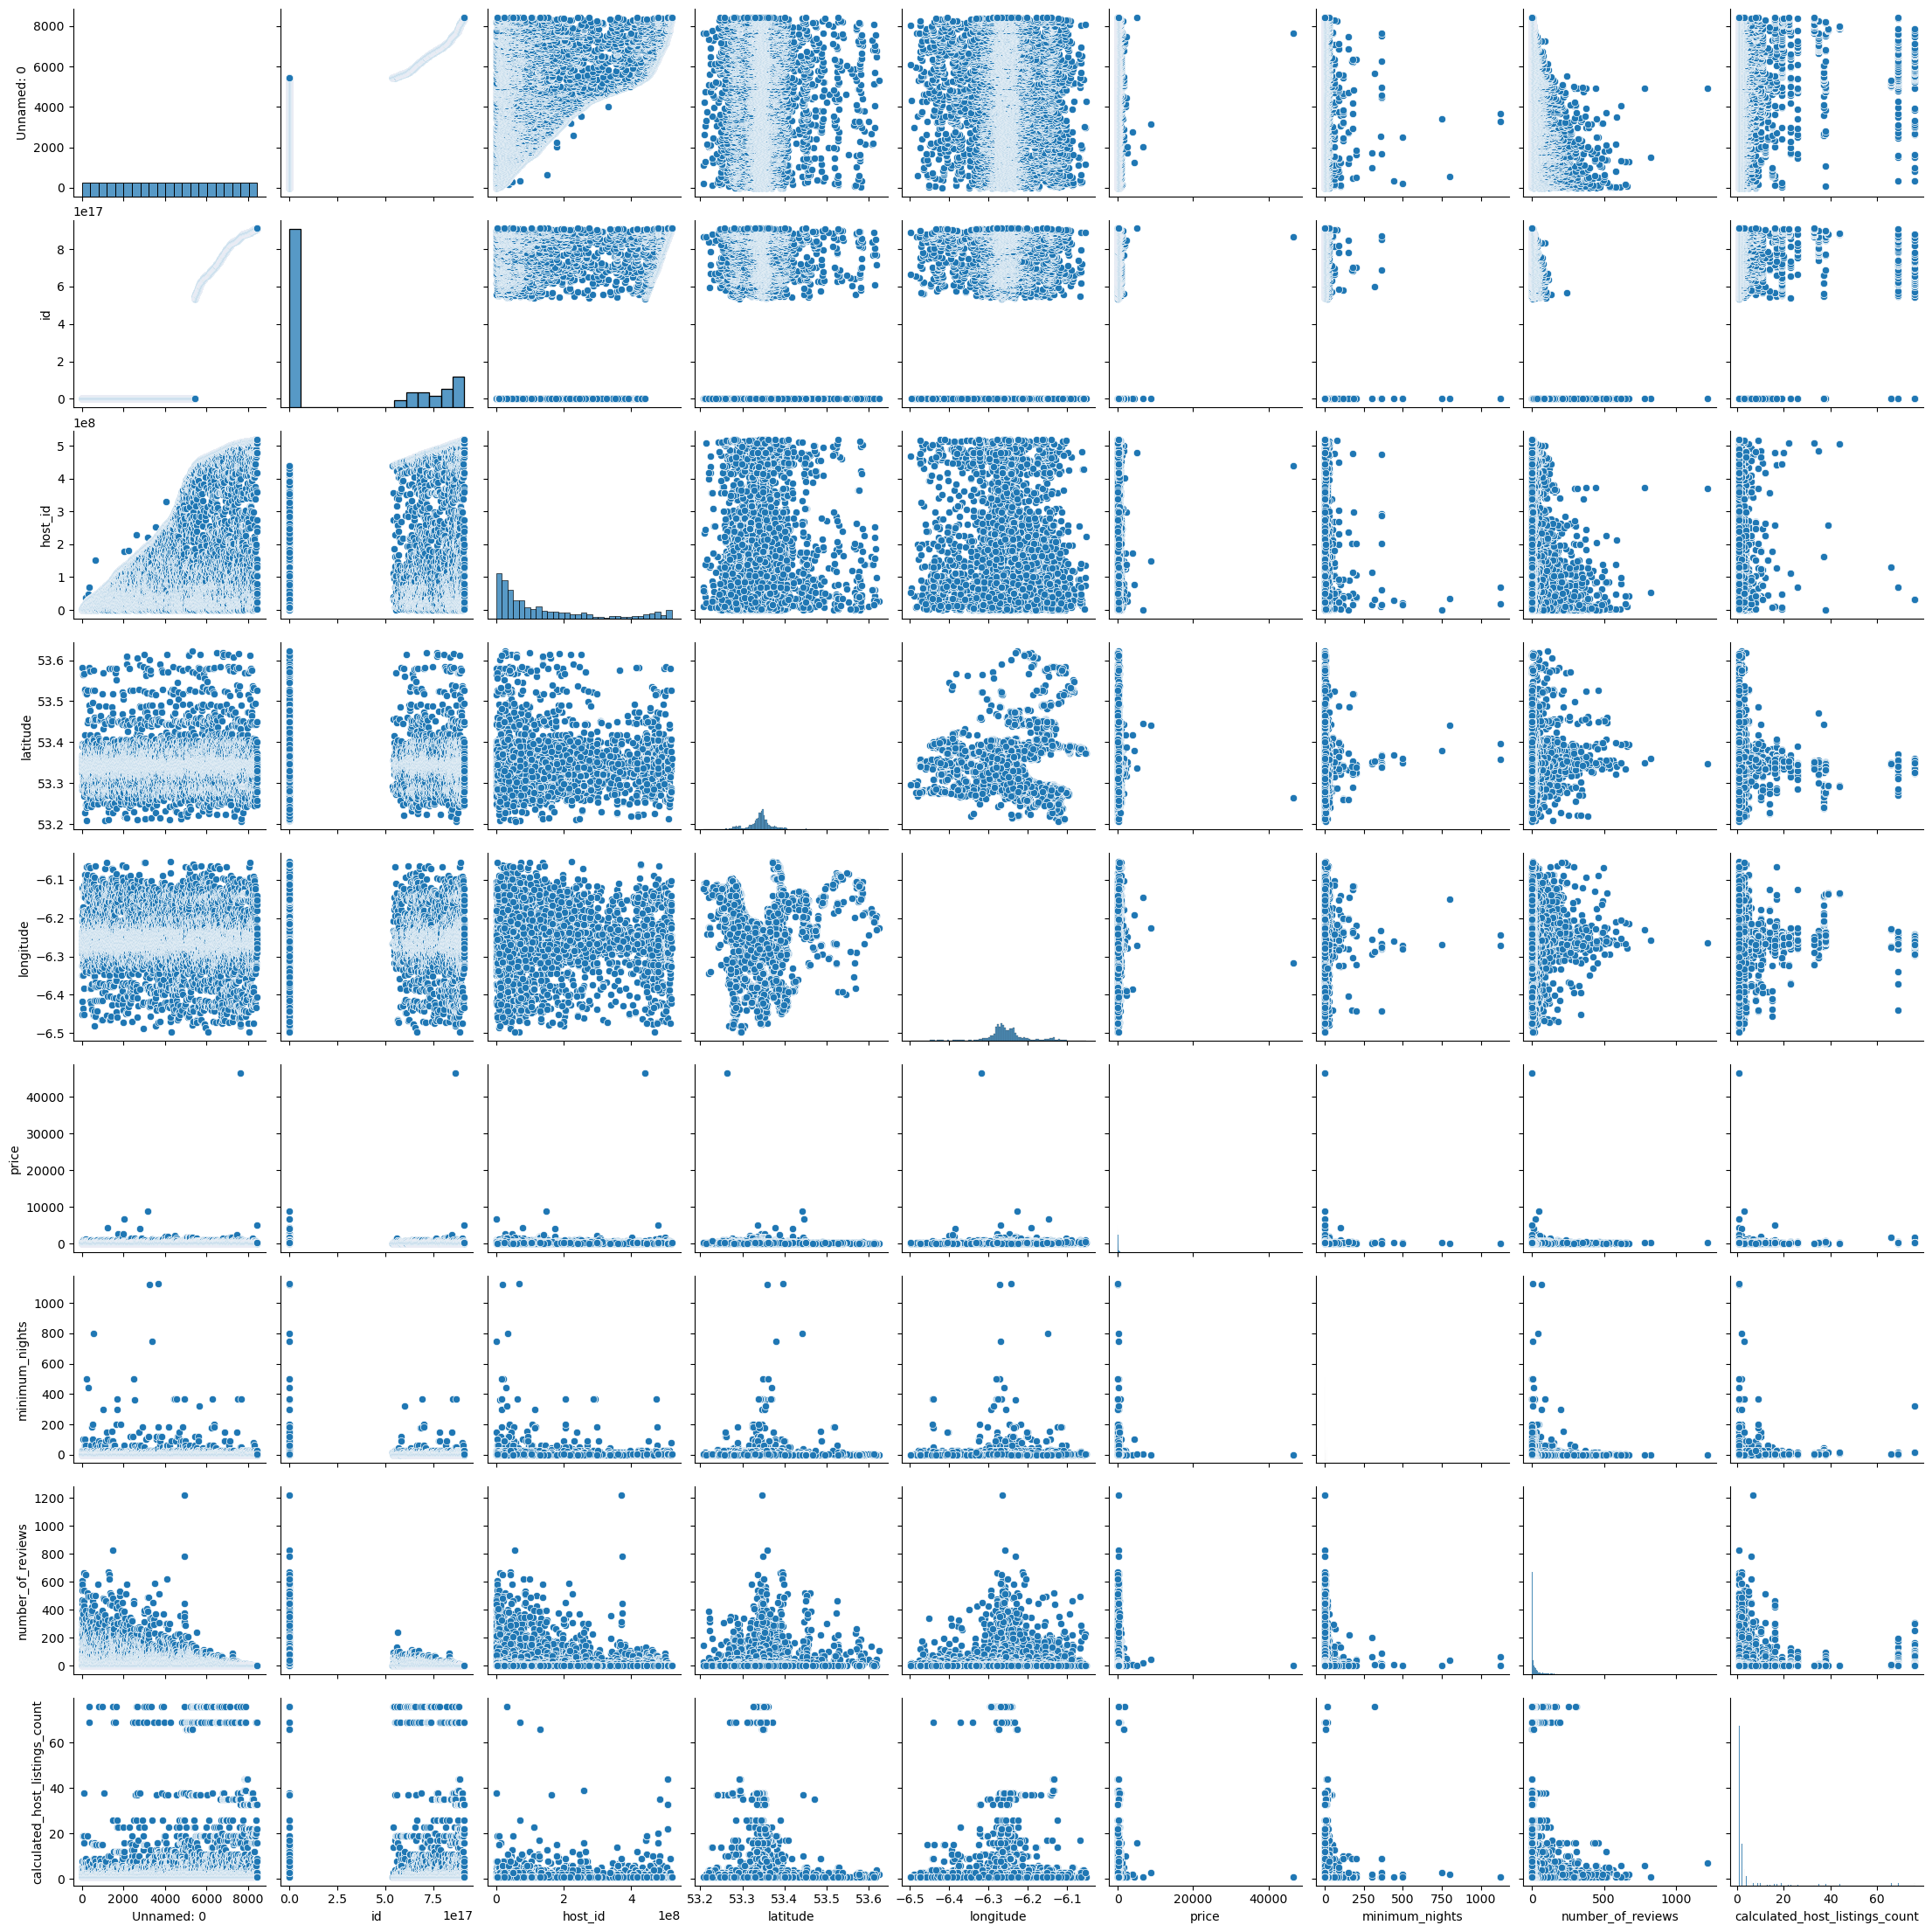

In [95]:
#Creating a pair plotfor 2023

h = sns.pairplot(listings_23)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

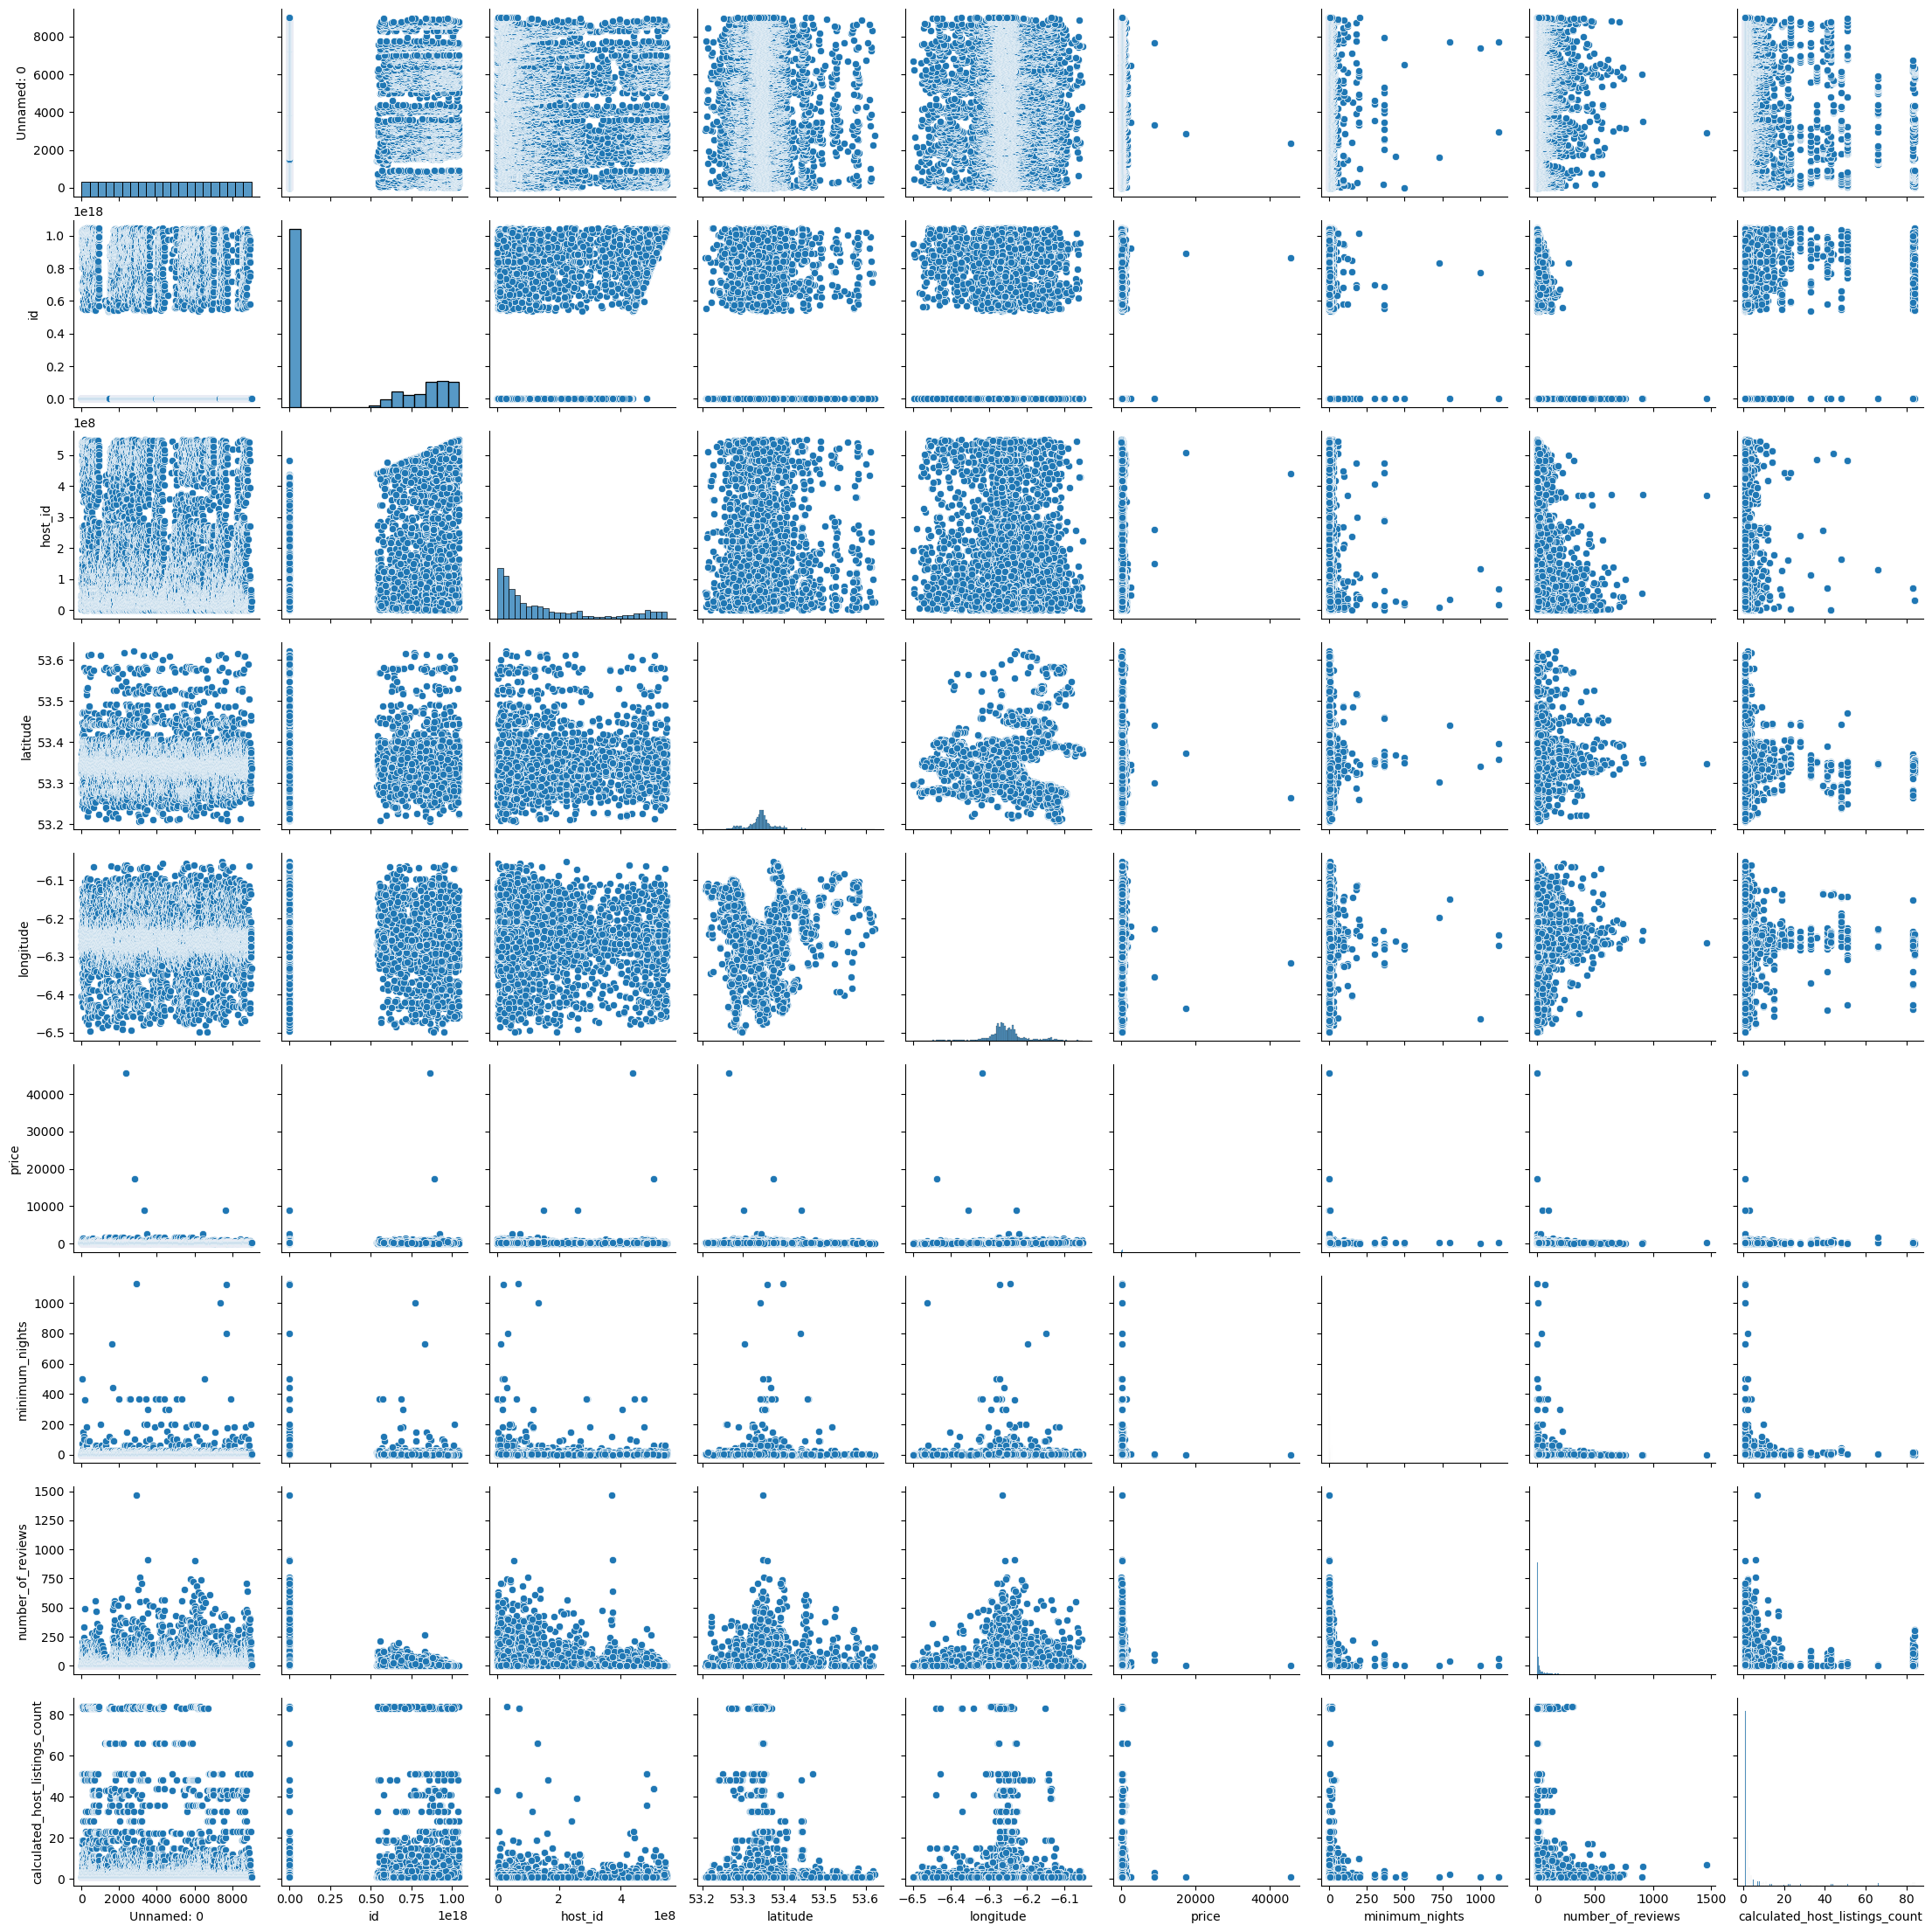

In [79]:
#Creating a pair plot 

g = sns.pairplot(listings_24)

In both years, there appears to be a slight negative relationship bewteen number of reviews and minimum nights i.e. the fewer minimum nights for a stay, the more reviews that property will have. 

Despite having more properties and therefore more opportunities to gain reviews, hosts with 2-10 properties seem to earn more reviews than hosts with more than 10.


## Creating a categorical plot - listings 2023

Creating a categorical variable that splits the "calculated_host_listings_count" column into categories

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


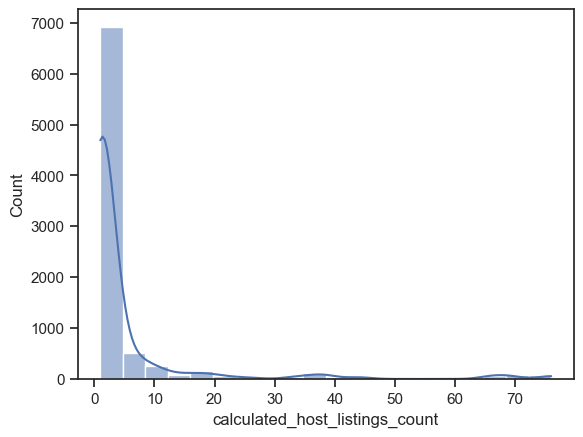

In [141]:
w = sns.histplot(listings_23['calculated_host_listings_count'], bins = 20, kde = True)

In [104]:
listings_23.loc[listings_23['calculated_host_listings_count'] == 1, 'Listing ownership'] = 'Single property'

In [106]:
listings_23.loc[(listings_23['calculated_host_listings_count'] >= 2) & (listings_23['calculated_host_listings_count'] <= 10), 'Listing ownership'] = 'Multiple properties'

In [107]:
listings_23.loc[listings_23['calculated_host_listings_count'] >= 11, 'Listing ownership'] = 'Excessive properties'

In [108]:
listings_23['Listing ownership'].value_counts(dropna = False)

Listing ownership
Single property         4872
Multiple properties     2709
Excessive properties     859
Name: count, dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


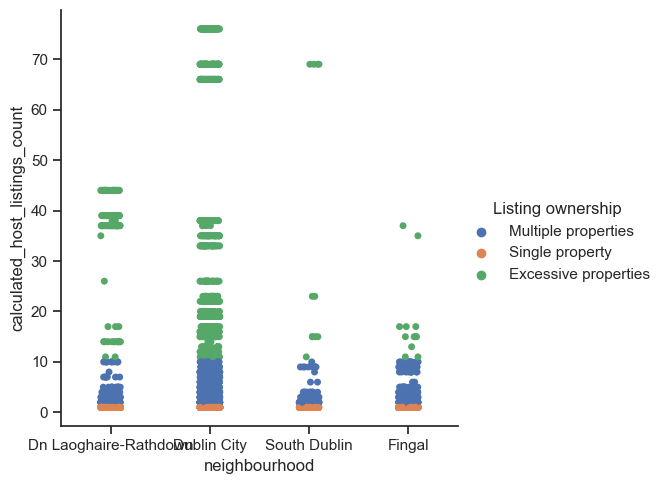

In [123]:
#Creating a categorical plot in seaborn using the categories created above

sns.set(style="ticks")
c = sns.catplot(x="neighbourhood", y="calculated_host_listings_count", hue="Listing ownership", data=listings_23)

The majority of hosts who have 'excessive' properties i.e. more than 10, have said properties in Dublin City. 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


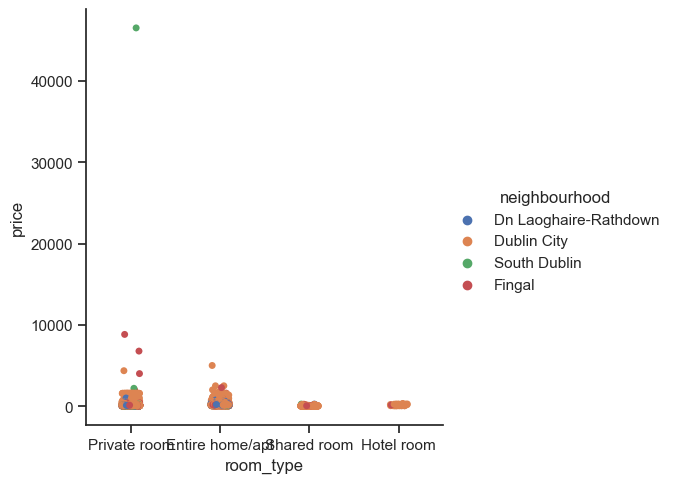

In [135]:
#Creating a categorical plot in seaborn

sns.set(style="ticks")
p = sns.catplot(x="room_type", y="price", hue="neighbourhood", data=listings_23)

Hypothesis 1: Properties in the city centre are more likely to be in demand therefore have higher prices and review counts. 

Hypothesis 2: Seasonality will impact reviews. More reviews will be posted around St. Patrick's Day and during the summer months when tourism is at its height. 

Hypothesis 3: Larger properties, particularly in Dublin City, will attract larger groups engender a higher price point, whereas less desirable accommodations such as shared rooms outside of Dublin City will be in less demand, therefore be cheaper.

Hypothesis 4: From 2023 to 2024 there are more listings and hosts own more properties. This will result in lower prices and reduced minimum stays in order to keep up with competition. 

## Exporting

In [136]:
corr.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'listings_23_corr_heatmap.png'))

In [138]:
q.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'listings_24_host_listings_vs_no_of_reviews.png'))

In [139]:
h.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'listings_23_pair_plot.png'))

In [140]:
g.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'listings_24_pair_plot.png'))

In [145]:
w.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'calc_host_listings_hist_23.png'))

In [146]:
c.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'calc_host_listings_vs_neighbourhood_vs_ownership_type_23.png'))

In [147]:
p.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'price_vs_room_type_vs_neighbourhood_23.png'))

In [151]:
listings_23.to_csv(os.path.join(path, '01 Data','Prepared Data', 'June 2023', 'listings_23_clean.csv'))

In [152]:
listings_24.to_csv(os.path.join(path, '01 Data','Prepared Data', 'March 2024', 'listings_24_clean.csv'))

In [153]:
reviews_23.to_csv(os.path.join(path, '01 Data','Prepared Data', 'June 2023', 'reviews_23_clean.csv'))

In [154]:
reviews_24.to_csv(os.path.join(path, '01 Data','Prepared Data', 'March 2024', 'reviews_24_clean.csv'))